In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("WA_Fn-UseC_-Customer-Churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,subscription,Multiple subscription,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No subscription,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No subscription,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   SeniorCitizen          7043 non-null   int64  
 3   Partner                7043 non-null   object 
 4   Dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   subscription           7043 non-null   object 
 7   Multiple subscription  7043 non-null   object 
 8   InternetService        7043 non-null   object 
 9   OnlineSecurity         7043 non-null   object 
 10  OnlineBackup           7043 non-null   object 
 11  DeviceProtection       7043 non-null   object 
 12  TechSupport            7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingMovies        7043 non-null   object 
 15  Cont

###  Converting TotalCharges from Object datatype to numeric datatype

In [4]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"] , errors = "coerce")

In [5]:
dataset.shape

(7043, 21)

In [6]:
dataset.isnull().sum()

customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
subscription              0
Multiple subscription     0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges             11
Churn                     0
dtype: int64

In [7]:
dataset[np.isnan(dataset['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,subscription,Multiple subscription,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No subscription,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No subscription,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
dataset = dataset.dropna(subset=['TotalCharges'])

In [9]:
dataset.shape

(7032, 21)

In [10]:
dataset = dataset.drop(['customerID'], axis = 1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,subscription,Multiple subscription,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No subscription,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No subscription,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
dataset[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


C:\Users\sathv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1599: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


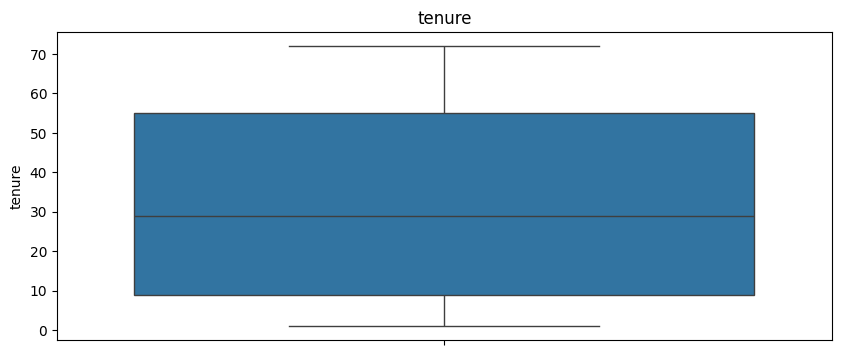

In [12]:
plt.figure(figsize=(10, 4))
plt.title('tenure')
sns.boxplot(dataset['tenure'], orient= "horizontal")
plt.show()

C:\Users\sathv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1599: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


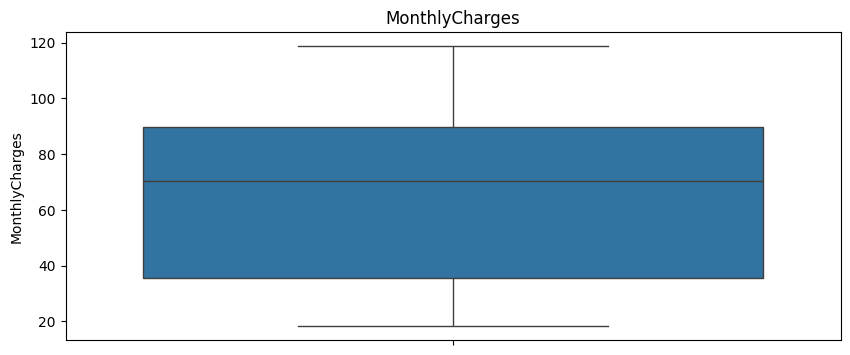

In [13]:
plt.figure(figsize=(10, 4))
plt.title('MonthlyCharges')
sns.boxplot(dataset['MonthlyCharges'], orient= "horizontal")
plt.show()

C:\Users\sathv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1599: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


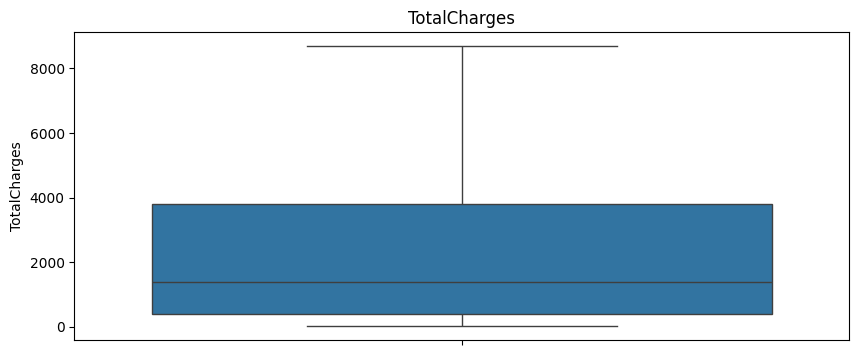

In [14]:
plt.figure(figsize=(10, 4))
plt.title('TotalCharges')
sns.boxplot(dataset['TotalCharges'], orient= "horizontal")
plt.show()

In [15]:
le = LabelEncoder()
non_numeric_features = [i for i in dataset.columns if i not in dataset.describe().columns]

In [16]:
for i in non_numeric_features :
    dataset[i] = le.fit_transform(dataset[i])

In [17]:
X = dataset.drop("Churn", axis = 1)
y = dataset["Churn"]

In [18]:
dataset.to_csv('TelcoCustomerChurnClean.csv', index=False)